<a href="https://colab.research.google.com/github/sasireddyvari/LifeCycle_DataScience/blob/master/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')

In [3]:
train.head() # 1 -- Survived and 0 not survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Missing Data**

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

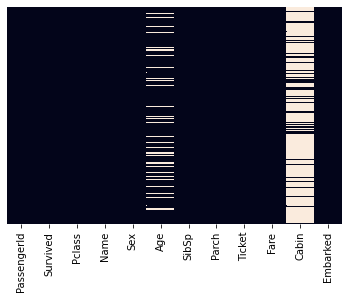

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [6]:
train.Age.mean()

29.69911764705882

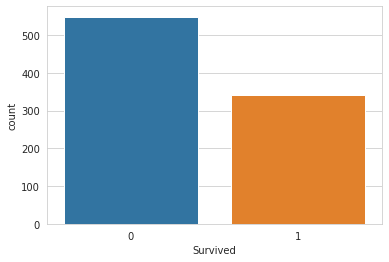

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

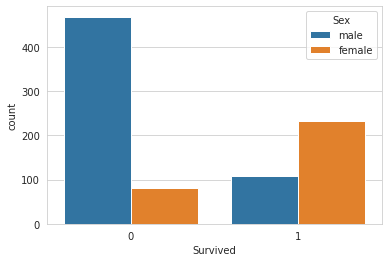

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

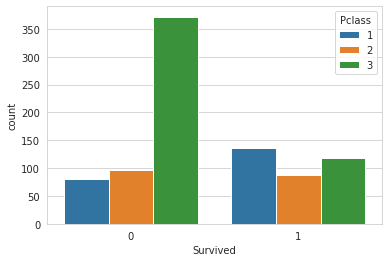

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


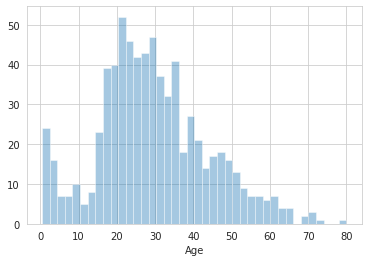

In [16]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

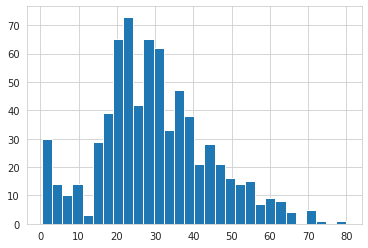

In [17]:
train['Age'].hist(bins=30)

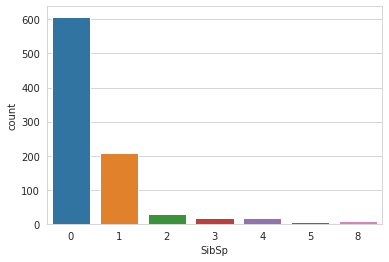

In [18]:
sns.countplot(x='SibSp',data=train)

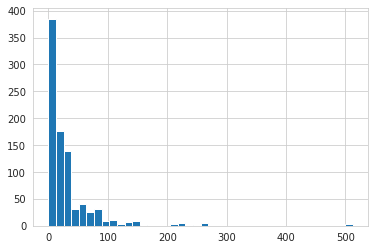

In [20]:
train['Fare'].hist(bins=40)

**Handling Null Values**

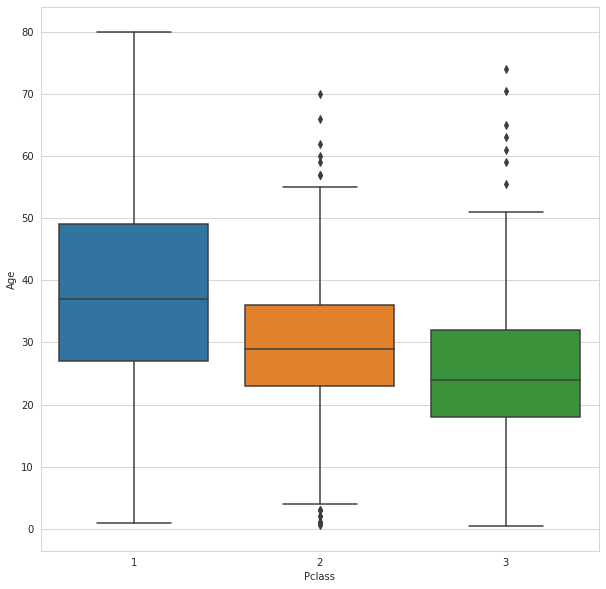

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=train)

In [25]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [27]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

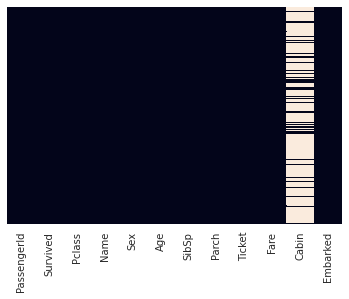

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [29]:
train[['Age','Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,24.0,3
889,26.0,1


In [62]:
train.drop('Cabin',inplace=True,axis=1)

**Handling Categorical features**

In [30]:
pd.get_dummies(train['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [32]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [33]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [37]:
train=pd.concat([train,Sex,Embark],axis=1)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [64]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [50]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test=train_test_split(train.drop('Survived',axis=1),
                                                  train['Survived'],
                                                  test_size=0.30,
                                                  random_state=101)

In [67]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
520,521,1,30.0,0,0,93.5000,0,0,1,0,0,1
510,511,3,29.0,0,0,7.7500,1,1,0,1,1,0
446,447,2,13.0,0,1,19.5000,0,0,1,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1
691,692,3,4.0,0,1,13.4167,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
575,576,3,19.0,0,0,14.5000,1,0,1,1,0,1
838,839,3,32.0,0,0,56.4958,1,0,1,1,0,1
337,338,1,41.0,0,0,134.5000,0,0,0,0,0,0
523,524,1,44.0,0,1,57.9792,0,0,0,0,0,0


In [68]:
t_train

520    1
510    1
446    1
2      1
691    1
      ..
575    0
838    1
337    1
523    1
863    0
Name: Survived, Length: 623, dtype: int64

In [69]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
predictions=logmodel.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
accuracy = confusion_matrix(y_test,predictions)

In [74]:
accuracy

array([[132,  22],
       [ 43,  71]])

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy=accuracy_score(y_test,predictions)

In [77]:
accuracy

0.7574626865671642

In [ ]:
pd.read_csv